Welcome to the 7 Gate Academy ML Questionnaire. Start by running the code cells from top to bottom and answer the questions. Please:

* **If a question involves coding, finish your response by printing your answer.**
* Use the cell below any question to write your answer. You may create additional cells to organize your work if desired.

If you are not familiar with tooling used in this questionnaire, feel free to refer to the below videos or other online resources:

* [Jupyter Notebook](https://matterhorn.dce.harvard.edu/engage/player/watch.html?id=e15f221c-5275-4f7f-b486-759a7d483bc8) watch from minute 12 until the git part
* [Pandas](https://matterhorn.dce.harvard.edu/engage/player/watch.html?id=f7ff1893-fbf7-4909-b44e-12e61a98a677) watch from minute 9 until the scraping part.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
np.random.seed(42)

def offset_data(data):
    if np.min(data) < 0:
        return np.add(data, (np.abs(np.min(data))) + 1.0)
    else:
        return data

height, width, depth = np.random.normal((0., 1000., 100.), (1., 100., 50.), size=(100, 3)).T.tolist()

height = offset_data(height)
width = offset_data(width)
depth = offset_data(depth)

## Basic Python 

**Question 1.** Calculate the average of "height" in the above data.

In [68]:
width=np.asarray(width)
print(height)
print(width)
print(depth)
print(height.mean())
print(depth.mean())
print(width.mean())

[3.44880195 4.47511766 4.53130062 3.49464784 3.19405007 2.38980027
 2.04406372 2.7263115  2.40770507 3.32778582 2.35038119 1.89437687
 3.16095139 3.14894904 2.83643952 2.23224359 3.29570609 2.56700552
 3.98308732 2.64287542 2.47291356 1.75588118 2.88007768 2.30696804
 2.91626176 3.7739903  3.04384858 3.30920037 2.1435942  3.28083891
 3.04916535 2.62442565 3.24820808 2.71750067 2.60937328 3.35613866
 3.20963819 2.92557392 2.75972683 1.78340976 3.74311975 1.55023674
 1.96155147 2.44861215 1.88978409 4.5020222  3.76560502 4.25923055
 3.21197059 1.63163119 3.20258065 3.1843415  4.81786231 3.60864141
 4.11068338 3.36486873 2.70669968 2.13627751 3.2287786  4.40562188
 3.57775515 3.43456021 3.42532542 1.43724057 3.16618154 3.33740518
 3.01029652 3.51287233 1.57441843 3.46587375 3.52297831 3.60347905
 2.17926258 3.03396194 3.63834799 4.0410384  2.23678409 3.16854639
 5.09603189 3.13854211 2.15956706 3.81784299 2.47714249 3.35706951
 5.074244   2.46785373 3.39590723 2.89256244 2.69951965 1.5219

**Question 2.** Create a Data Frame in Pandas from the data that was provided in the beginning of the document and have `height`, `width` and `depth` as its headers.

In [69]:
dataset = pd.DataFrame({'HEIGHT': height, 'WIDTH':width, 'DEPTH':depth})
print(dataset)

         DEPTH    HEIGHT        WIDTH
0   164.371682  3.448802   986.173570
1   120.280407  4.475118   976.584663
2   108.513536  4.531301  1076.743473
3   108.700768  3.494648   953.658231
4    45.741364  3.194050   808.671976
5   147.699622  2.389800   898.716888
6   205.269694  2.044064   858.769630
7    60.749846  2.726311  1006.752820
8    74.437576  2.407705  1011.092259
9   117.402568  3.327786   939.936131
10  131.312394  2.350381  1185.227818
11   70.945073  1.894377  1082.254491
12   65.577953  3.160951   804.032988
13  140.555669  3.148949  1073.846658
14   58.061156  2.836440   969.889630
15  184.843367  2.232244   953.936123
16  148.191454  3.295706   823.695984
17  162.571070  2.567006   932.307800
18   90.026379  3.983087  1093.128012
19  180.764512  2.642875  1033.126343
20   76.670507  2.472914   981.434102
21  199.799257  1.755881  1081.252582
22  150.069056  2.880078  1100.353290
23  208.889084  2.306968  1036.139561
24    1.000000  2.916262  1156.464366
25  117.0368

**Question 3.** Find the rows with `heights` that are greater than the average `height` while their `widths` are less than the average `width`. Print the `depth` values of these rows sorted ascendingly.

In [70]:
special_depth=dataset.loc[(dataset['HEIGHT']> height.mean()) & (dataset['WIDTH']< width.mean()), ['DEPTH']]
print(special_depth.sort_values('DEPTH', ascending=True))


         DEPTH
4    45.741364
12   65.577953
60   78.442630
74  108.390662
3   108.700768
81  115.262193
45  115.884179
9   117.402568
1   120.280407
96  121.581143
92  135.477359
65  139.673511
64  140.646301
47  141.218948
46  143.360252
16  148.191454
29  157.650627
61  167.687280
71  169.935716
53  171.341485
79  174.608922
98  176.967249
83  177.880353
54  180.156062
90  190.145443
40  202.126971
94  238.638924
59  267.995714


**Question 4.** Create two new columns in the `data` dataframe, based on the previous question's condition. If a row has a higher than average `height` and a lower than average `width`, the new column, called `thickness_class`, should receive a value of "thin". Otherwise it should receive a value of "thick". If a row has a `thickness_class` of "thin", the other new column, called `thickness_ratio` should receive a value of `height` over `width`. If `thickness class` is "thick", `thickness_ratio` should receive a value of `width` over `height`. 

In [71]:
dataset['thickness_class']=np.where((dataset['HEIGHT']>height.mean())&(dataset['WIDTH']<width.mean()), 'thick', 'thin')
dataset['thicknes_ratio']=np.where(dataset['thickness_class']=='thick', dataset['HEIGHT']/dataset['WIDTH'],dataset['WIDTH']/dataset['HEIGHT'])
print(dataset.sort_values('DEPTH', ascending=True))







         DEPTH    HEIGHT        WIDTH thickness_class  thicknes_ratio
24    1.000000  2.916262  1156.464366            thin      396.557120
78   30.730126  5.096032  1063.391902            thin      208.670575
36   36.048694  3.209638   992.555408            thin      309.242148
73   38.623996  3.033962  1231.465857            thin      405.893641
4    45.741364  3.194050   808.671976           thick        0.003950
84   56.018757  5.074244  1103.246526            thin      217.420866
14   58.061156  2.836440   969.889630            thin      341.939119
31   58.811508  2.624426   960.789185            thin      366.095029
7    60.749846  2.726311  1006.752820            thin      369.272851
12   65.577953  3.160951   804.032988           thick        0.003931
48   70.139720  3.211971  1078.182287            thin      335.676263
11   70.945073  1.894377  1082.254491            thin      571.298408
52   72.422080  4.817862  1047.383292            thin      217.395854
8    74.437576  2.40

## Data & Functions

**Question 5.** A dictionary is provided below in which data for a number of `clients` is stored. Each client might have a number of `children` which are instances of `client` themselves. Write a function to flatten the nested dictionary giving each `client` a new key `chlid_of` which has the name of the parent client, or `None` if there is none.

In [72]:
clients = {
    'client0': {
        'name': 'alex',
        'age': 45,
        'children': {
            'client1': {
                'name': 'susan',
                'age': 12
            }
        },
    },
    'client2': {
        'name': 'mary',
        'age': 45,
        'children': {
            'client3': {
                'name': 'susan',
                'age': 35,
                'children': {
                    'client4': {
                        'name': 'stacy',
                        'age': 5
                    }
            },
        }
                    }, 
    },
    'client5': {
        'name': 'grace',
        'age': 25
    }
}


"""
Output should look like:
{'client0': {'age': 45, 'child_of': None, 'name': 'alex'},
 'client1': {'age': 12, 'child_of': 'client0', 'name': 'susan'},
 'client2': {'age': 45, 'child_of': None, 'name': 'mary'},
 'client3': {'age': 35, 'child_of': 'client2', 'name': 'susan'},
 'client4': {'age': 5, 'child_of': 'client3', 'name': 'stacy'},
 'client5': {'age': 25, 'child_of': None, 'name': 'grace'}}

"""


"\nOutput should look like:\n{'client0': {'age': 45, 'child_of': None, 'name': 'alex'},\n 'client1': {'age': 12, 'child_of': 'client0', 'name': 'susan'},\n 'client2': {'age': 45, 'child_of': None, 'name': 'mary'},\n 'client3': {'age': 35, 'child_of': 'client2', 'name': 'susan'},\n 'client4': {'age': 5, 'child_of': 'client3', 'name': 'stacy'},\n 'client5': {'age': 25, 'child_of': None, 'name': 'grace'}}\n\n"

In [73]:
D_F=pd.DataFrame(clients)
print(D_F)

                                            client0  \
age                                              45   
children  {'client1': {'name': 'susan', 'age': 12}}   
name                                           alex   

                                                    client2 client5  
age                                                      45      25  
children  {'client3': {'name': 'susan', 'age': 35, 'chil...     NaN  
name                                                   mary   grace  


## Probabilities

Meetings with your manager always go overtime, but always ends within 15 minutes after the scheduled end time.

If $X$ is the difference between the actual meeting end time and the scheduled meeting end time, the probabilty density distribution of $X$ can be expressed as follows: 

$$
f(x) = \left\{ \begin{array}{ll}
   \frac{x}{75}, &\mbox{$0<x \le 10$} \\
  \frac{1}{75}(30 - 2x), &\mbox{$10<x \le 15$}
       \end{array} \right.
$$

**Question 6.** Draw the above probability density distribution (put the picture below. You can draw by hand or use a library like Matplotlib)




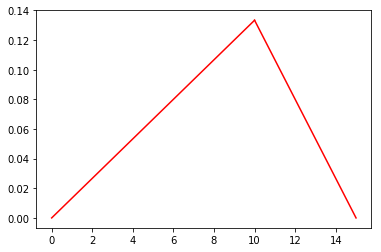

In [76]:
x1=np.linspace(0, 10, 100)
y1=x1/75
x2=np.linspace(10, 15, 100)
y2=(30-2*x2)/75
plt.plot(x1,y1,'r')
plt.plot(x2,y2,'r')

**Question 7.** What is the probability of your meeting ending within 5 minutes after the scheduled meeting end time? Explain how you determined this.



In [77]:
from scipy.integrate import quad
def integrand(x):
    return x/75
ans_5, err = quad (integrand, 0, 5)
print(ans_5)


0.16666666666666669


**Question 8.** What is the probability of your meeting ending exactly 10 minutes after the scheduled meeting end time? Explain how you determined this.


In [78]:
def integrand(x):
    return x/75
ans_10, err = quad (integrand, 0, 10)
print(ans_10)


0.6666666666666667


**Question 9.** What is the probability of your meeting ending between 5 minutes and 15 minutes after the scheduled meeting end time? Explain how you determined this.

In [79]:
def integrand(x):
    while 0<x<=10:
        return x/75
    while 10<x<=15:
        return (30-2*x)/75
ans_5_15, err = quad (integrand, 5, 15)
print(ans_5_15)

0.8333333333333335


**Question 10.** On average by how many minutes does your meeting go over time? Explain how you determined this.

In [296]:
def integrand(x):
    while 0<x<=10:
        return x**2/75
    while 10<x<=15:
        return (30*x-2*x**2)/75
ave, err=quad(integrand, 0, 15)
print(ave)

8.333333333333334


##Analysis

### A good fit

The plot below is given to you in which the red line is the linear regression of the blue dots.

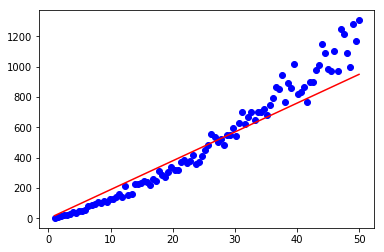

In [80]:
x_vals = np.linspace(1, 50, 100)
data = np.array([(x, np.random.normal(5*x**1.4, x*1.8)) for x in x_vals])

plt.plot(data[:,0], data[:,1], 'ob')
plt.plot(x_vals, 19*x_vals, '-r')
plt.show()

**Question 11.** is it a good or bad idea to fit a linear regression line? 
If it's a good idea explain why? If not, do you have a way of improving this regression?

In [ ]:
## It may look initially that a regression line could be a good option for fitting the data in the graph above. 
## However, looking more carefully the regression line consistently over estimated and underestimated the data
## at particular regions wich is not good. Also by plotting the residuals, a good fit should show residuals that
# are randomely distributed around zero. For this even without plotting the residual I can say that it won'y show 
# a random distribution around zero. 
# To improve the fit we can add hight order terms to the regression model.  









###A Rare Condition

You decide to develop your mobile app. The app detects a rare skin condition by simply taking a photo. 0.5% of the population has this condition. 95% of the time your app detects the condition in a person who actually has the condition(in other words, given a patient has the condition and gets scanned, your app will detect  it 95% of the time). 2% of patients who don't have the condition, gets misclassified as having the condition by the app. (hint: you can use Bayes Theorem)

**Question 12.** What is the probability of a person who gets tested by your app, to receive a negative result (in other words, what is the probability of the app saying a patient has the condition)?

In [81]:
#the wording in this question is not clear for me! 
#I interpreted it two ways
# 1) The probability of a person who gets tested to receive a negative result : You either have the condition 
# and thats not detected by the app (0.005* 0.05=0.00025) or (adding to) you don't have the condition and the app says
# that you don't have it (.995*0.98=0.9751) and **** the total would be = 97.5% ****** 
# 2) I also interpret it based on the sentence added inside the paranthesis as: The app says the person has the condition 
#while she does not have it  is: 
(.995*0.02)/(0.95*0.005+0.995*0.02)

0.8073022312373225

**Question 13.** What's the probability of a person having the condition if your app gives a positive result for the condition?

In [82]:
# P(c|+)=P(+|C)P(c)/P(c)=  P(+|C)*P(C)/ P(C)*P(+|C)+P(C-)*P(+|C-) = 
(0.95*0.005)/(0.95*0.005+0.995*0.02)

# Therfore the chance of a person have the condition if the app gives a positive result is ~ 19% and 

0.19269776876267747

**Question 14** Do you think your app is ready to go to market? Why?

In [83]:
# Comparing the answers in question #13 and #12 (2nd interpretation), the app is not ready to go to market
#because the cahnce misdiagnsing (someone who does not have the condion but the app gives possive is around 81%)
# which is much bigger than the app diagnose the condition correctly (~ 19%). 

**Question 15.** There is a fair coin (one side heads, one side tails) and an unfair coin (both sides tails). You pick one at random, flip it 5 times, and observe that it comes up as tails all five times. What is the chance that you are flipping the unfair coin?

In [84]:
#P(U)=Probability of Unfair = 50%
#P(F)=Probability of Fair =50%
#P(T|U)=Probability of Tail=100%
#P(H|U)= Probability of Heads=0% 
#P(U|T)= P(T|U)*P(U)/(P(T|U)*P(U)+P(F)*P(T|F))
# The probability of getting tail with fair coin 5 times in a row is P(T|F):
#0.5**5=0.03125
#the probability of having tail with unfair coin 5 times in a row is P(T|U): 
#1**5 =1 
# The probability of getting tail 5 time in a row in total (either with fair or unfair coin) P(T)=P(T|F)+P(T|U):
#1+0.03125=1.03125
# The probability of the coin being unfair while getting tail five times is P(U|T)= P(T|U)/P(T):
1/1.03125 = 0.9696 ~ 97% 

SyntaxError: invalid syntax (<ipython-input-84-d345df469901>, line 13)

## Problem Solving

**Question 16.** A permutation can be specified by an array P, where P[i] represents the location of the element at i in the permutation. For example, [2, 1, 0] represents the permutation where elements at the index 0 and 2 are swapped.

Given an array and a permutation, write a function that applies the permutation to the array. For example, given the array ["a", "b", "c"] and the permutation [2, 1, 0], return ["c", "b", "a"].

In [85]:
def apply_perm(arr, perm):
    n= len(arr)
    result=np.empty(n, dtype=object)
    for i in range(n):
        result[i]=arr[perm[i]]
    return result 
A=["a", "b", "c"]
P=[2, 1, 0]
print(apply_perm(A, P)) 

['c' 'b' 'a']


**Question 17.** Spreadsheets often use this alphabetical encoding for its columns: "A", "B", "C", ..., "AA", "AB", ..., "ZZ", "AAA", "AAB", ....

Write a function that given a column number it returns the alphabetical column id. For example, given 1, return "A". Given 27, return "AA".

In [86]:
def col_num_to_col_id(n):
    string = ""
    while n > 0:
        n, remainder = divmod(n - 1, 26)
        string = chr(65 + remainder) + string
    return string

print(col_num_to_col_id(1700))


BMJ


**Question 18.** Let's define a "sevenish" number to be one which is either a power of 7, or the sum of unique powers of 7. The first few sevenish numbers are 1, 7, 8, 49, and so on. Create an algorithm to find the nth sevenish number.

###Gradient Descent 

**Question 19.** Using numpy implement a version of gradient descent to find the optimal slope and y-intercept for the linear relationship for the data in ML_data.csv. 

You can use the following numpy command to import the data:
```
np.genfromtxt("ML_data.csv", delimiter=",")
```

After running, your code should print out the following line:
```
"Best Slope found: {}, Best y-intercept found: {} Number of Iterations ran: {}."
```

Use the code cell below to write your answer. You may create additional cells to organize your work if desired.

In [109]:
import os 
ML = pd.read_csv("ML_data.csv")
ML_new=ML.rename(columns={'32.502345269453031':'x', '31.70700584656992':'y'})
print(ML_new)



            x           y
0   53.426804   68.777596
1   61.530358   62.562382
2   47.475640   71.546632
3   59.813208   87.230925
4   55.142188   78.211518
5   52.211797   79.641973
6   39.299567   59.171489
7   48.105042   75.331242
8   52.550014   71.300880
9   45.419730   55.165677
10  54.351635   82.478847
11  44.164049   62.008923
12  58.168471   75.392870
13  56.727208   81.436192
14  48.955889   60.723602
15  44.687196   82.892504
16  60.297327   97.379897
17  45.618644   48.847153
18  38.816818   56.877213
19  66.189817   83.878565
20  65.416052  118.591217
21  47.481209   57.251819
22  41.575643   51.391744
23  51.845187   75.380652
24  59.370822   74.765564
25  57.310003   95.455053
26  63.615561   95.229366
27  46.737619   79.052406
28  50.556760   83.432071
29  52.223996   63.358790
..        ...         ...
69  31.588117   50.392670
70  53.660932   63.642399
71  46.682229   72.247251
72  43.107820   57.812513
73  70.346076  104.257102
74  44.492856   86.642020
75  57.50453

1.4796491688889395 0.10148121494753726


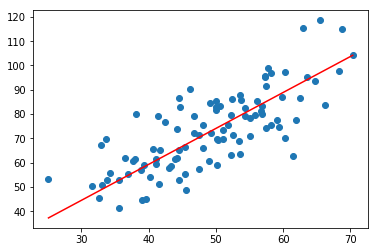

In [116]:
# fitting a line y_pred=m*x_pred+c

m= 0 
c=0 

#learninh rate L:
L=0.0001 
#Number of iteration:
epochs =1000

n=float(len(ML_new['x']))

for i in range (epochs):
    y_pred = m*ML_new['x']+c 
    #derivative with respect to m
    D_m= (-2/n) *sum(ML_new['x']*(ML_new['y']-y_pred))
    #derivative with respect to c
    D_c=(-2/n)*sum(ML_new['y']-y_pred) 
    m=m-L*D_m
    c=c-L*D_c
print(m, c)

y_pred=m*ML_new['x']+c
plt.scatter(ML_new['x'], ML_new['y'])
#ML_new.plot(x='x', y='y', style='o')
plt.plot([min(ML_new['x']), max(ML_new['x'])], [min(y_pred), max(y_pred)], color='red')
plt.show()         


In [114]:
#def cost_function(A,B, m, b):
    N = len('A')
    total_error = 0.0
    for i in range(N):
        total_error += ('A'[i] - (m*'B'[i] + b))**2
    return total_error / N


def update_weights(A, B, m, b, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len('A')

    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*'A'[i] * ('B'[i] - (m*'A'[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*('B'[i] - (m*'A'[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / N) * learning_rate
    b -= (b_deriv / N) * learning_rate

    return m, b


def train(A, B, m, b, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        m,b = update_weights('A', 'B', m, b, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function('A', 'B', m, b)
        cost_history.append(cost)

        # Log Progress
    return m, b, cost_history
print 'iter={:d}    m={:.2f}    b={:.4f}    cost={:.2}'  format(i, m, b, cost)


IndentationError: unexpected indent (<ipython-input-114-70bcb0f63f98>, line 2)

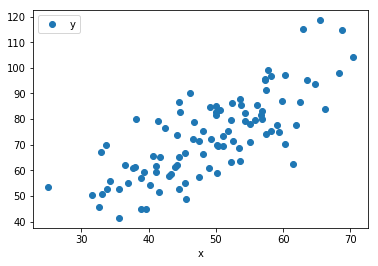

In [95]:
ML_new.plot(x='x', y='y', style='o')

**Question 20** Given a number in Roman numeral format, write a function to convert it to decimal.

The values of Roman numerals are as follows:

{

    'M': 1000,
    'D': 500,
    'C': 100,
    'L': 50,
    'X': 10,
    'V': 5,
    'I': 1
}

In [92]:
def from_roman(num):
    roman_numerals = {'I':1, 'V':5, 'X':10, 'L':50, 'C':100, 'D':500, 'M':1000}
    result = 0
    for i,c in enumerate(num):
        if (i+1) == len(num) or roman_numerals[c] >= roman_numerals[num[i+1]]:
            result += roman_numerals[c]
        else:
            result -= roman_numerals[c]
    return result
print(from_roman('MIV'))

1004


###N Queens With a Twist
Given an NxN chess board with N queens randomly placed on the board. 

**Question 21.** Write a program that return the minimum number of legal moves required to reposition the queens so that no queen is threatening any other queen.

A legal move constitutes moving a single queen any number of spaces horizontally, vertically or diagonally. 

A queen cannot "jump" over another queen.

No space may hold more than 1 queen at any given time.